# Figs for poster session

In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import gcsfs
import dask
import dask.array as dsa
import numpy as np
#import intake
import fsspec
import xmitgcm
from xhistogram.xarray import histogram
#from xmitgcm.llcreader.llcmodel import faces_dataset_to_latlon
%matplotlib inline

base_dir = '/Users/shanicebailey/Documents/WMT/datasets/ECCOv4r3/cum_vol_theta_nb'


In [2]:
ls -ltrh /Users/shanicebailey/Documents/WMT/datasets/ECCOv4r3/cum_vol_theta_nb

total 10963808
-rw-r--r--@ 1 shanicebailey  staff   110K Feb 11 19:09 dVdt.nc
-rw-r--r--@ 1 shanicebailey  staff   304K Feb 11 19:09 ds_vol.nc
-rw-r--r--@ 1 shanicebailey  staff   695K Feb 11 19:09 omega_ds.nc
-rw-r--r--@ 1 shanicebailey  staff   1.8G Feb 11 19:11 ds_tmp_wg.nc
-rw-r--r--@ 1 shanicebailey  staff   2.0G Feb 11 19:11 ds_slt_wg.nc
-rw-r--r--@ 1 shanicebailey  staff   1.7M Feb 12 16:26 cum-vol-theta-ecco.ipynb
-rw-r--r--  1 shanicebailey  staff   9.0K Feb 12 16:32 plane-nb.ipynb
-rw-r--r--@ 1 shanicebailey  staff    60M Feb 16 13:48 coords.nc
-rw-r--r--@ 1 shanicebailey  staff    16K Feb 16 14:07 ds_dt.nc
-rw-r--r--@ 1 shanicebailey  staff   807M Feb 16 14:33 ds_tns.nc
-rw-r--r--@ 1 shanicebailey  staff   618M Feb 16 17:02 ds_velocity.nc
-rw-r--r--@ 1 shanicebailey  staff   2.4M Feb 16 17:17 coords_ds.nc


In [3]:
base_dir = '/Users/shanicebailey/Documents/WMT/datasets/ECCOv4r3/cum_vol_theta_nb'
coords = xr.open_dataset(f'{base_dir}/coords_ds.nc')
ds_ts = xr.open_dataset(f'{base_dir}/ds_tns.nc')
ds_tmp = xr.open_dataset(f'{base_dir}/ds_tmp_wg.nc')
ds_velocity = xr.open_dataset(f'{base_dir}/ds_velocity.nc')
ds = xr.merge([ds_ts, ds_tmp, ds_velocity])
ds

<xarray.Dataset>
Dimensions:                  (i: 92, i_g: 93, j: 40, j_g: 41, k: 50, k_l: 50, time: 288, time_snp: 287)
Coordinates:
  * k                        (k) int64 0 1 2 3 4 5 6 7 ... 43 44 45 46 47 48 49
  * time                     (time) datetime64[ns] 1992-01-15 ... 2015-12-14
  * time_snp                 (time_snp) datetime64[ns] 1992-02-01 ... 2015-12-01
  * k_l                      (k_l) int64 0 1 2 3 4 5 6 ... 43 44 45 46 47 48 49
Dimensions without coordinates: i, i_g, j, j_g
Data variables:
    THETA                    (time, k, j, i) float32 ...
    SALT                     (time, k, j, i) float32 ...
    THETA_snp                (time_snp, k, j, i) float32 ...
    SALT_snp                 (time_snp, k, j, i) float32 ...
    dt                       (time) float64 ...
    conv_horiz_adv_flux_TH   (time, k, j, i) float32 ...
    conv_horiz_diff_flux_TH  (time, k, j, i) float32 ...
    conv_vert_adv_flux_TH    (time, k, j, i) float32 ...
    conv_vert_diff_flux_TH   (time, k, j, i) float32 ...
    surface_flux_conv_TH     (k, time, j, i) float32 ...
    sw_flux_conv_TH          (time, j, i, k) float32 ...
    theta                    (time, k, j, i) float32 ...
    total_tendency_TH_truth  (time, k, j, i) float64 ...
    UVELMASS                 (time, k, j, i_g) float32 ...
    VVELMASS                 (time, k, j_g, i) float32 ...
    WVELMASS                 (time, k_l, j, i) float32 ...
    ETAN                     (time, j, i) float32 ...

In [4]:
coords

<xarray.Dataset>
Dimensions:   (face: 13, i: 92, i_g: 93, j: 40, j_g: 41, k: 50, k_l: 50, k_p1: 51, k_u: 50, time: 288, time_snp: 287)
Coordinates:
  * k_l       (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k         (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * k_u       (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * face      (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time_snp  (time_snp) datetime64[ns] 1992-02-01 1992-03-01 ... 2015-12-01
  * time      (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * k_p1      (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49 50
Dimensions without coordinates: i, i_g, j, j_g
Data variables:
    XG        (j_g, i_g) float32 ...
    dyC       (j_g, i) float32 ...
    rAz       (j_g, i_g) float32 ...
    rA        (j, i) float32 ...
    YG        (j_g, i_g) float32 ...
    dxG       (j_g, i) float32 ...
    Zp1       (k_p1) float32 ...
    YC        (j, i) float32 ...
    drF       (k) float32 ...
    hFacS     (k, j_g, i) float32 ...
    iter_snp  (time_snp) int64 ...
    PHrefF    (k_p1) float32 ...
    Z         (k) float32 ...
    hFacW     (k, j, i_g) float32 ...
    Zl        (k_l) float32 ...
    dxC       (j, i_g) float32 ...
    iter      (time) int64 ...
    rAs       (j_g, i) float32 ...
    XC        (j, i) float32 ...
    drC       (k_p1) float32 ...
    dyG       (j, i_g) float32 ...
    Zu        (k_u) float32 ...
    PHrefC    (k) float32 ...
    hFacC     (k, j, i) float32 ...
    Depth     (j, i) float32 ...
    rAw       (j, i_g) float32 ...

### Check that the terms in the budget seem to balance

In [5]:
terms = ['conv_horiz_adv_flux_TH', 'conv_horiz_diff_flux_TH',
         'conv_vert_adv_flux_TH', 'conv_vert_diff_flux_TH',
         'surface_flux_conv_TH', 'surface_flux_conv_TH']
total = sum(ds[term] for term in terms)

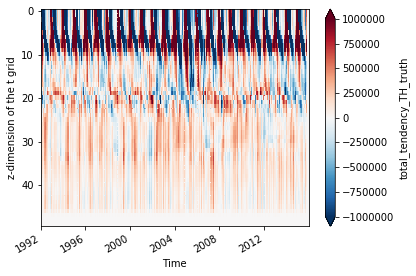

In [6]:
ds.total_tendency_TH_truth.sum(dim=['i', 'j']).plot(y='k', yincrease=False, vmax=1e6)

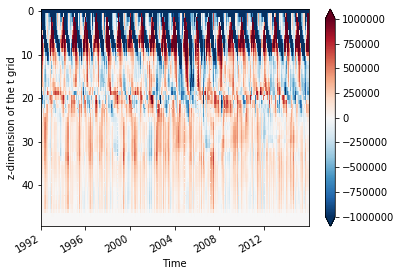

In [7]:
total.sum(dim=['i', 'j']).plot(y='k', yincrease=False, vmax=1e6)

### Check that the actual tendency of temperature balances what the budget says

(Don't match up exactly because of mismatch in time)

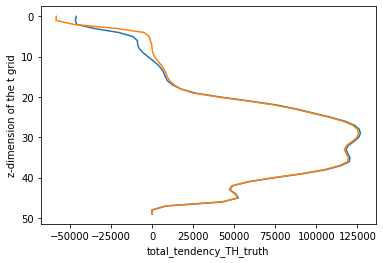

In [8]:
delta_theta = ds.THETA_snp.isel(time_snp=-1) - ds.THETA_snp.isel(time_snp=0)
total_time = (ds.time_snp[-1] - ds.time_snp[0]).astype('f8')*1e-9

vol = (coords.drF * coords.rA * coords.hFacC)
((delta_theta * vol).sum(dim=['j', 'i'])/ total_time).plot(y='k', yincrease=False)
ds.total_tendency_TH_truth.sum(dim=['j', 'i']).mean(dim='time').plot(y='k', yincrease=False)

# dV/dt == OMEGA(total_tendency_TH_truth)

### Entire WG column budget

In [9]:
# define bins
delta_theta = 0.1
theta_bins = np.arange(-2.2, 2.2, delta_theta)
#define theta_bines for WG range

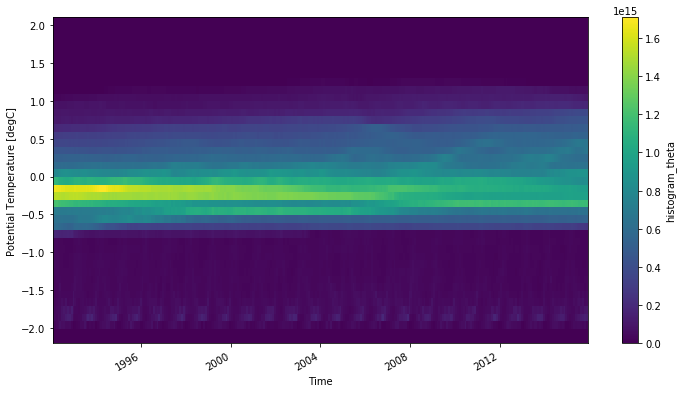

In [10]:
# theta distribution in WG region
theta_dist = histogram(ds.THETA_snp.rename('theta'), bins=[theta_bins],
                       weights=vol, dim=['i', 'j', 'k'])
theta_dist.plot(x='time_snp', figsize=(12, 6))

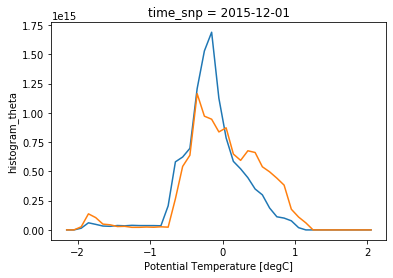

In [11]:
theta_dist[0].plot()
theta_dist[-1].plot()

# $\frac{\partial \mathcal{V}}{\partial t}$

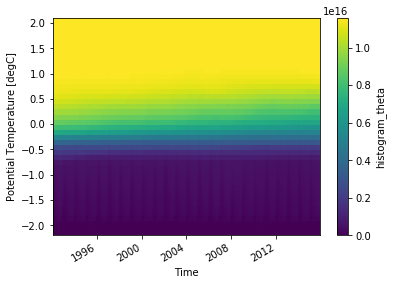

In [12]:
# cumulative volume
V = theta_dist.cumsum(dim='theta_bin')
V.transpose().plot()

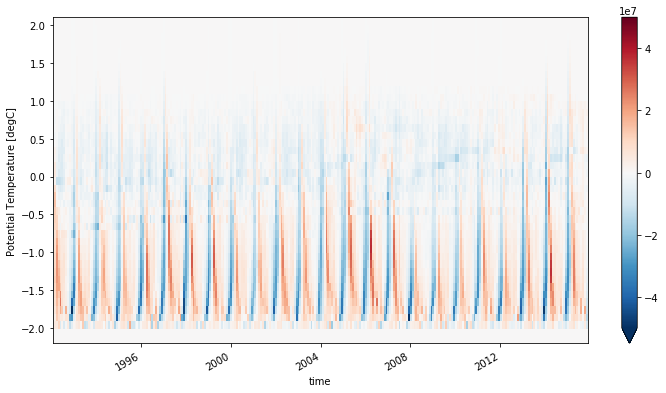

In [13]:
delta_V = V.diff(dim='time_snp')
delta_V.coords['time'] = 'time_snp', ds.time[1:-1].values
dVdt = delta_V.swap_dims({'time_snp': 'time'}) / ds.dt[1:-1]
dVdt.plot(x='time', figsize=(12, 6), vmax=5e7)

In [14]:
omega_total = -histogram(ds.THETA.rename('theta'), bins=[theta_bins],
                         weights=ds.total_tendency_TH_truth.fillna(0.),
                         dim=['i', 'j', 'k']) / delta_theta

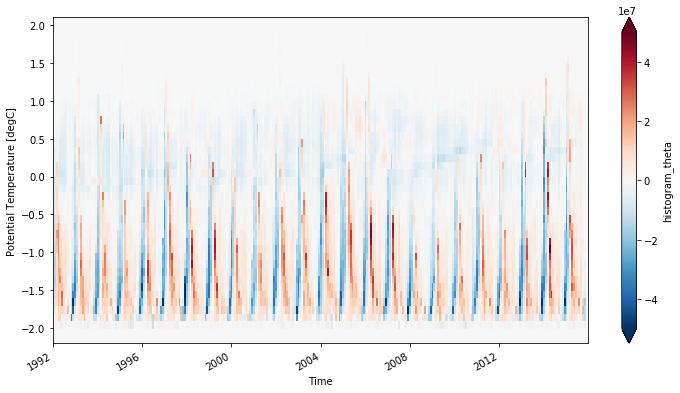

In [15]:
omega_total.plot(x='time', figsize=(12, 6), vmax=5e7)

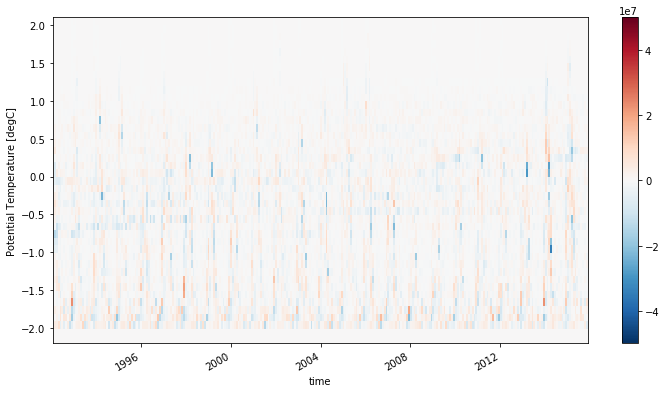

In [64]:
R1 = dVdt - omega_total
R1.plot(x='time', figsize=(12, 6), vmax=5e7)

In [45]:
omega_total

<xarray.DataArray 'histogram_theta' (time: 288, theta_bin: 43)>
array([[      -0.        ,       -0.        ,       -0.        , ...,
              -0.        ,       -0.        ,       -0.        ],
       [      -0.        ,       -0.        ,  2498695.7636261 , ...,
              -0.        ,       -0.        ,       -0.        ],
       [      -0.        ,       -0.        ,  1356810.8302851 , ...,
              -0.        ,       -0.        ,       -0.        ],
       ...,
       [      -0.        ,       -0.        ,   900872.87023865, ...,
              -0.        ,       -0.        ,       -0.        ],
       [      -0.        ,       -0.        , -2417410.18787985, ...,
              -0.        ,       -0.        ,       -0.        ],
       [      -0.        ,       -0.        ,       -0.        , ...,
              -0.        ,       -0.        ,       -0.        ]])
Coordinates:
  * time       (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * theta_bin  (theta_bin) float64 -2.15 -2.05 -1.95 -1.85 ... 1.85 1.95 2.05

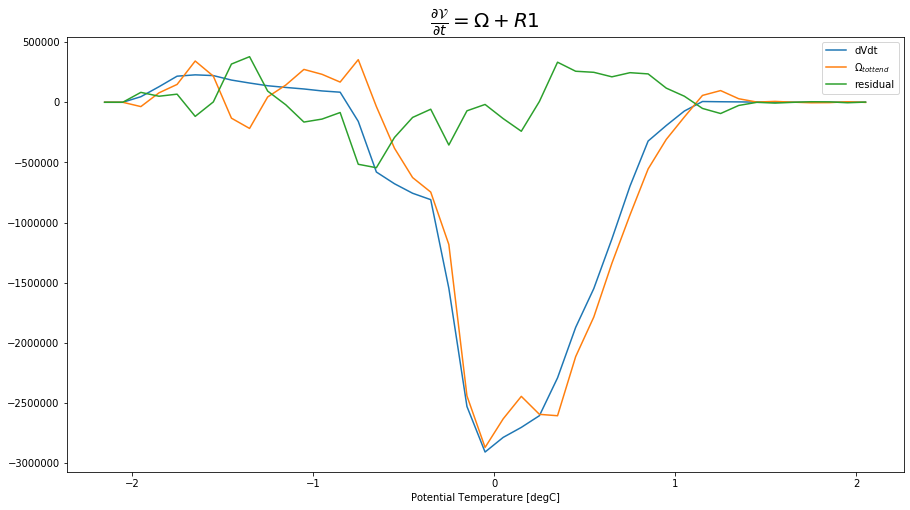

In [78]:
plt.figure(figsize=(15,8))
dVdt.mean(dim='time').plot(label='dVdt')
omega_total.mean(dim='time').plot(label=r'$\Omega_{tottend}$')
R1.mean(dim='time').plot(label='residual')
plt.legend()
plt.title(r'$\frac{\partial \mathcal{V}}{\partial t} = \Omega + R1$', fontsize=20);

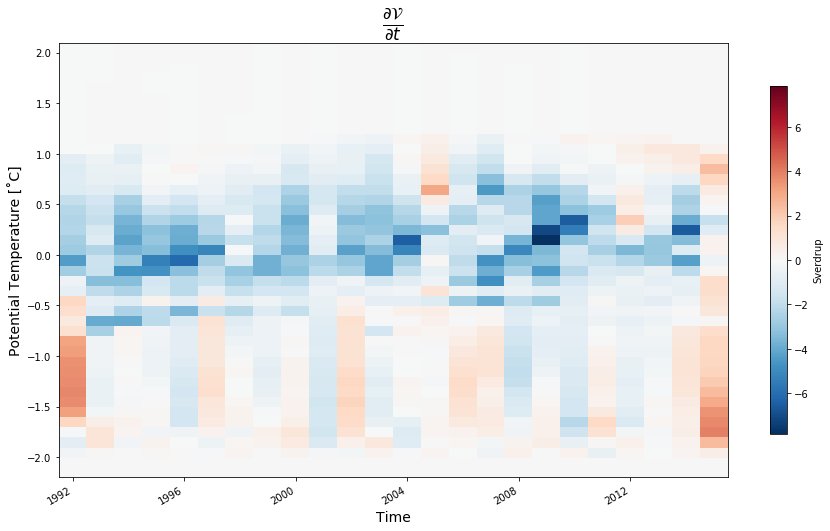

In [134]:
(dVdt/1e6).resample(time='AS').mean(dim='time').plot(x='time', figsize=(15,8), cbar_kwargs={'shrink': 0.8, 'label':'Sverdrup'})
plt.ylabel('Potential Temperature [˚C]', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title(r'$\frac{\partial \mathcal{V}}{\partial t}$', fontsize=24);
#plt.clabel('Sverdrup [$10^{6} \frac{m^3}{s}$] ')

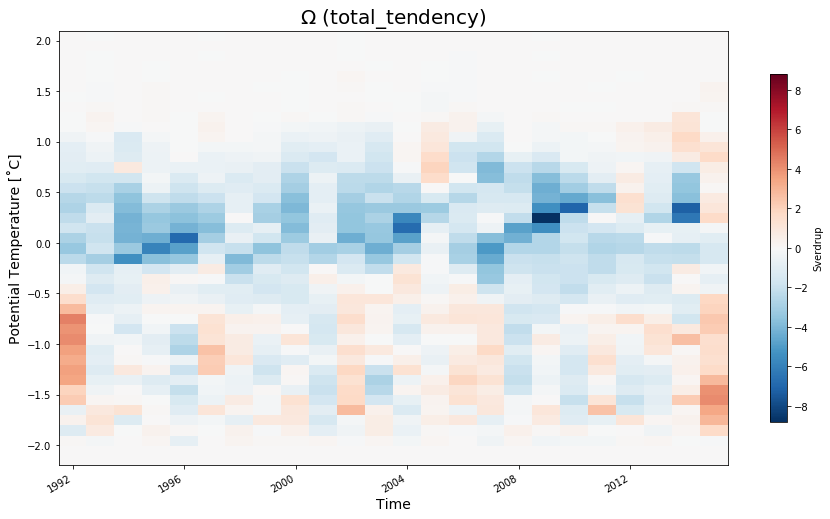

In [133]:
(omega_total/1e6).resample(time='AS').mean(dim='time').plot(x='time', figsize=(15,8), cbar_kwargs={'shrink': 0.8, 'label':'Sverdrup'})
plt.ylabel('Potential Temperature [˚C]', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('$\Omega$ (total_tendency)', fontsize=20);
#plt.clabel('Sverdrup [$10^{6} \frac{m^3}{s}$] ')

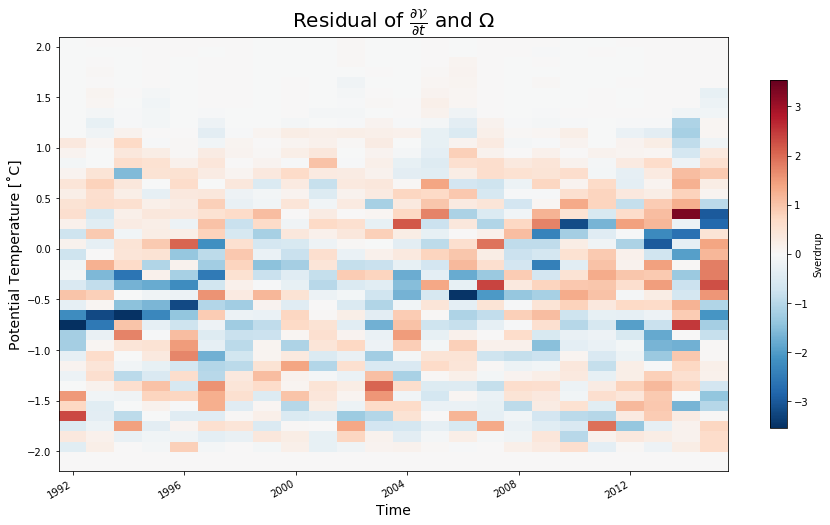

In [132]:
(R1/1e6).resample(time='AS').mean(dim='time').plot(x='time', figsize=(15,8), cbar_kwargs={'shrink': 0.8, 'label':'Sverdrup'})
plt.ylabel('Potential Temperature [˚C]', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title(r'Residual of $\frac{\partial \mathcal{V}}{\partial t}$ and $\Omega$', fontsize=20);
#plt.clabel('Sverdrup [$10^{6} \frac{m^3}{s}$] ')

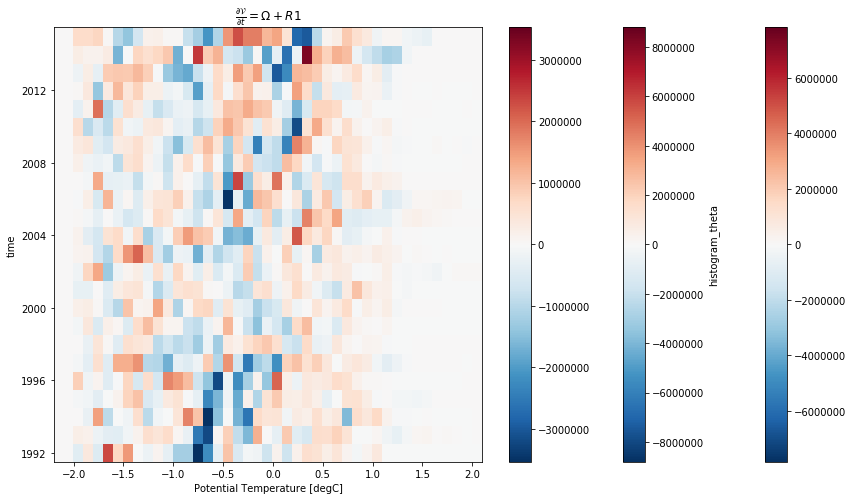

In [73]:
plt.figure(figsize=(15,8))
dVdt.resample(time='AS').mean(dim='time').plot()
omega_total.resample(time='AS').mean(dim='time').plot()
R1.resample(time='AS').mean(dim='time').plot()
plt.title(r'$\frac{\partial \mathcal{V}}{\partial t} = \Omega + R1$');

### Calculate Omega

In [18]:
def histogram_func(variable):
    """Generalized xhistogram's histogram function 
    for adv and diff flux terms"""
    hist = histogram(ds.theta.rename('theta'), bins=[theta_bins],
              weights=variable.fillna(0.), dim=['i', 'j', 'k'])
    return hist / delta_theta

In [19]:
all_tendencies = list(ds_tmp)
all_tendencies.remove('theta')
all_tendencies

['conv_horiz_adv_flux_TH',
 'conv_horiz_diff_flux_TH',
 'conv_vert_adv_flux_TH',
 'conv_vert_diff_flux_TH',
 'surface_flux_conv_TH',
 'sw_flux_conv_TH',
 'total_tendency_TH_truth']

In [20]:
all_dsets = xr.merge([histogram_func(ds_tmp[var]).rename('OMEGA_' + var)
                      for var in all_tendencies])
all_dsets

<xarray.Dataset>
Dimensions:                        (theta_bin: 43, time: 288)
Coordinates:
  * time                           (time) datetime64[ns] 1992-01-15 ... 2015-12-14
  * theta_bin                      (theta_bin) float64 -2.15 -2.05 ... 1.95 2.05
Data variables:
    OMEGA_conv_horiz_adv_flux_TH   (time, theta_bin) float64 0.0 0.0 ... 0.0 0.0
    OMEGA_conv_horiz_diff_flux_TH  (time, theta_bin) float64 0.0 0.0 ... 0.0 0.0
    OMEGA_conv_vert_adv_flux_TH    (time, theta_bin) float64 0.0 0.0 ... 0.0 0.0
    OMEGA_conv_vert_diff_flux_TH   (time, theta_bin) float64 0.0 0.0 ... 0.0 0.0
    OMEGA_surface_flux_conv_TH     (time, theta_bin) float64 0.0 0.0 ... 0.0 0.0
    OMEGA_sw_flux_conv_TH          (time, theta_bin) float64 0.0 0.0 ... 0.0 0.0
    OMEGA_total_tendency_TH_truth  (time, theta_bin) float64 0.0 0.0 ... 0.0 0.0

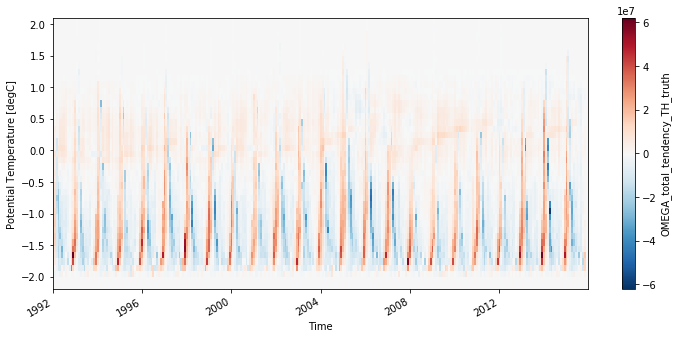

In [87]:
all_dsets.OMEGA_total_tendency_TH_truth.plot(x='time', figsize=(12, 5))

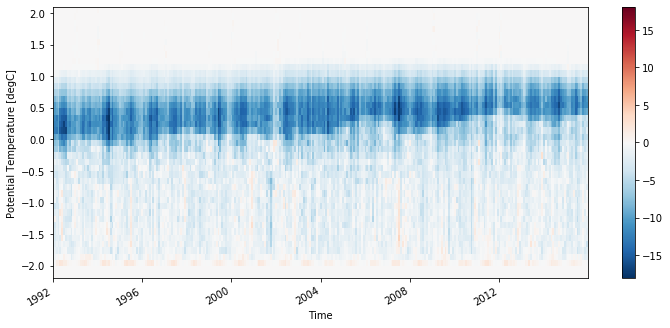

In [21]:
psi_from_omega = -(all_dsets.OMEGA_conv_horiz_adv_flux_TH + all_dsets.OMEGA_conv_vert_adv_flux_TH)
(psi_from_omega/1e6).plot(x='time', figsize=(12, 5))

## $\Psi$

In [22]:
#this is the "dA" part of the equation
u_transport = (ds.UVELMASS * coords.dyG * coords.drF).isel(i_g=-1) #m^3/s #(-) values -> westward, (+) values -> east
v_transport = (ds.VVELMASS * coords.dxG * coords.drF).isel(j_g=-1) #m^3/s #(-) values -> south, (+) values -> north
w_transport = ds.WVELMASS.isel(k_l=0) * coords.rA #m^3/s #(-) values are massflux into the ocean, (+) values are massflux out of the ocean

In [23]:
u_transport.sum(dim=['j', 'k']).mean()/1e6

<xarray.DataArray ()>
array(-20.552632)

In [24]:
v_transport.mean(dim='time').sum()/1e6

<xarray.DataArray ()>
array(20.544308)

In [25]:
w_transport_mean_value = w_transport.mean(dim='time').sum().values
w_transport_mean_value

array(8592.012, dtype=float32)

In [26]:
# hack theta to be on same grid pt as velocity components
theta_at_u = ds.theta.isel(i=-1)
theta_at_v = ds.theta.isel(j=-1)
theta_at_w = ds.theta.isel(k=0)

In [27]:
#this is the delta function part of the equation above
u_binned = histogram(theta_at_u, bins=[theta_bins],
                     weights=u_transport, dim=['k', 'j'])
v_binned = histogram(theta_at_v, bins=[theta_bins],
                     weights=v_transport, dim=['k', 'i'])
w_binned = histogram(theta_at_w, bins=[theta_bins],
                     weights=w_transport, dim=['i', 'j'])

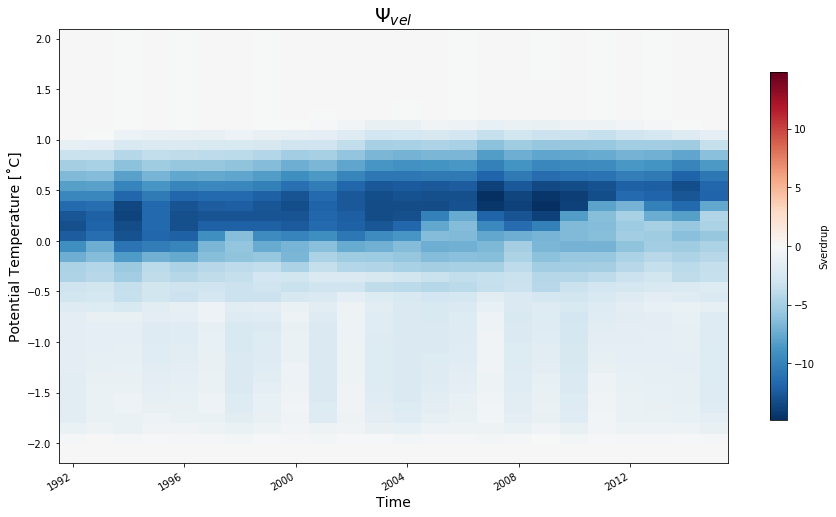

In [129]:
psi = -(u_binned + v_binned).cumsum(dim='theta_bin')
(psi/1e6).resample(time='AS').mean(dim='time').plot(x='time', figsize=(15,8), cbar_kwargs={'shrink': 0.8, 'label':'Sverdrup'})
plt.ylabel('Potential Temperature [˚C]', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('$\Psi_{vel}$', fontsize=20);
#plt.clabel('Sverdrup [$10^{6} \frac{m^3}{s}$] ')

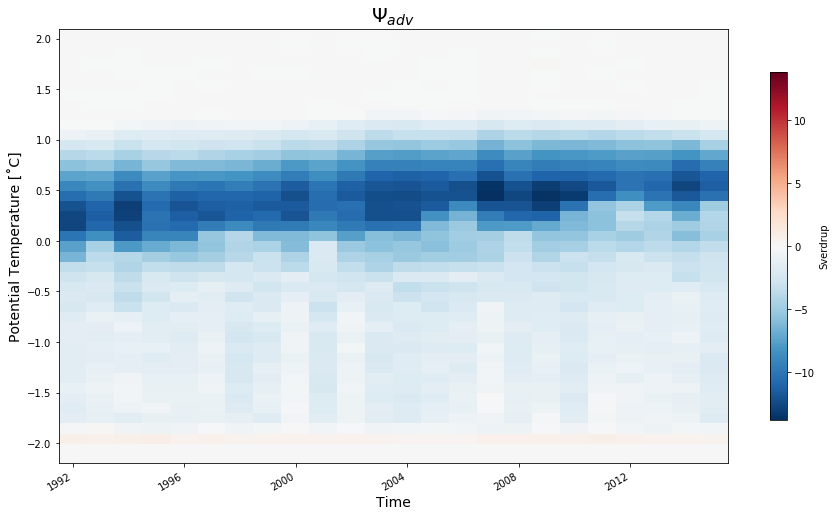

In [130]:
(psi_from_omega/1e6).resample(time='AS').mean(dim='time').plot(x='time', figsize=(15,8), cbar_kwargs={'shrink': 0.8, 'label':'Sverdrup'})
plt.ylabel('Potential Temperature [˚C]', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('$\Psi_{adv}$', fontsize=20);
#plt.clabel('Sverdrup [$10^{6} \frac{m^3}{s}$] ')

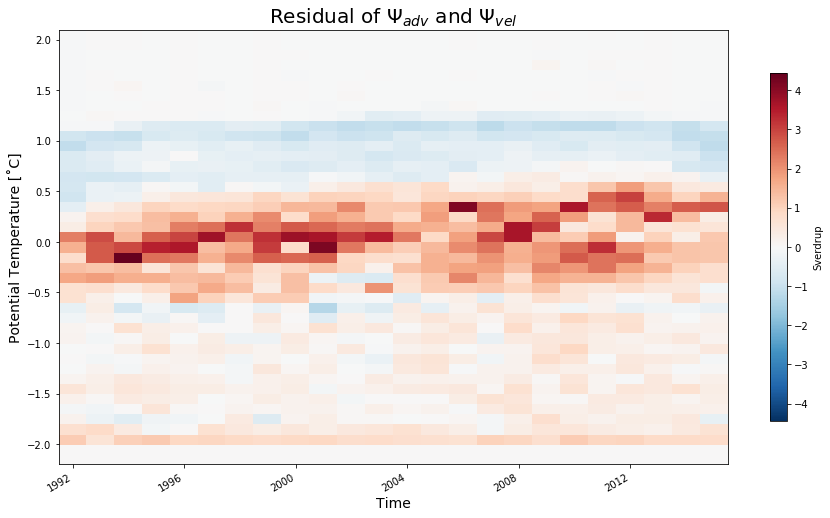

In [131]:
R2 = psi_from_omega - psi
(R2/1e6).resample(time='AS').mean(dim='time').plot(x='time', figsize=(15,8), cbar_kwargs={'shrink': 0.8, 'label':'Sverdrup'})
plt.ylabel('Potential Temperature [˚C]', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title(r'Residual of $\Psi_{adv}$ and $\Psi_{vel}$', fontsize=20);
#plt.clabel('Sverdrup [$10^{6} \frac{m^3}{s}$] ')

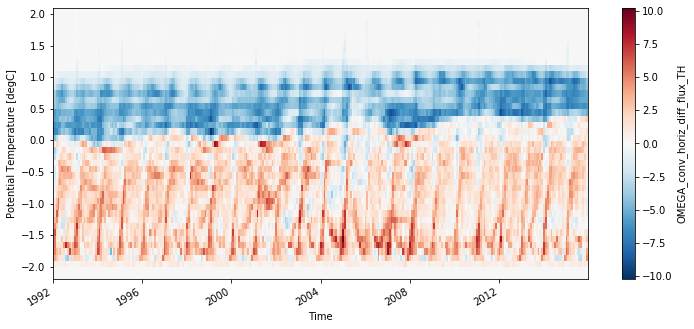

In [40]:
(all_dsets.OMEGA_conv_horiz_diff_flux_TH/1e6).plot(x='time', figsize=(12, 5))

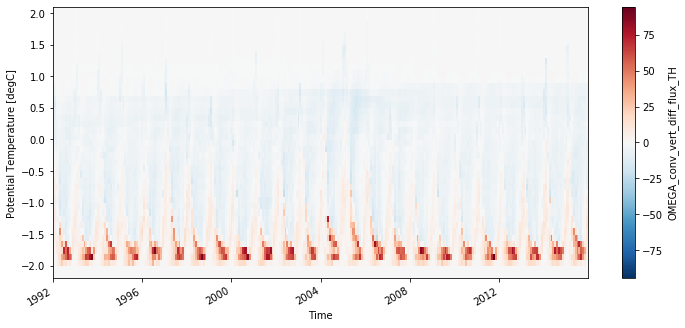

In [41]:
(all_dsets.OMEGA_conv_vert_diff_flux_TH/1e6).plot(x='time', figsize=(12, 5))

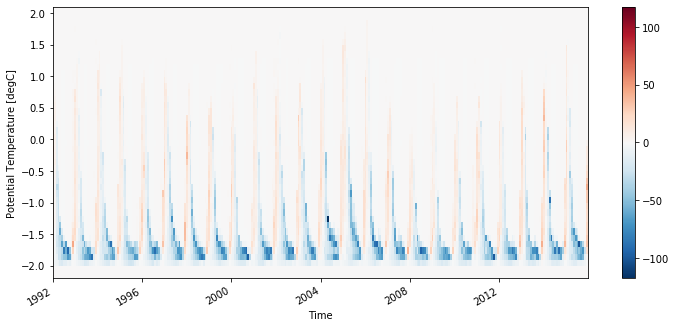

In [42]:
((all_dsets.OMEGA_surface_flux_conv_TH + all_dsets.OMEGA_sw_flux_conv_TH)/1e6).plot(x='time', figsize=(12, 5))

In [48]:
R2

<xarray.DataArray (time: 288, theta_bin: 43)>
array([[      0.        ,       0.        , -198673.43746185, ...,
          39516.05540371,   39516.05540371,   39516.05540371],
       [      0.        ,       0.        ,   66488.45651627, ...,
          19683.9925108 ,   19683.9925108 ,   19683.9925108 ],
       [      0.        ,       0.        , 1167476.95212364, ...,
           7422.01575899,    7422.01575899,    7422.01575899],
       ...,
       [      0.        ,       0.        ,   83981.45363998, ...,
         -18362.68653286,  -18362.68653286,  -18362.68653286],
       [      0.        ,       0.        ,  107553.18658829, ...,
          -4422.97934532,   -4422.97934532,   -4422.97934532],
       [      0.        ,       0.        , -180177.12921143, ...,
           1860.66237593,    1860.66237593,    1860.66237593]])
Coordinates:
  * time       (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * theta_bin  (theta_bin) float64 -2.15 -2.05 -1.95 -1.85 ... 1.85 1.95 2.05

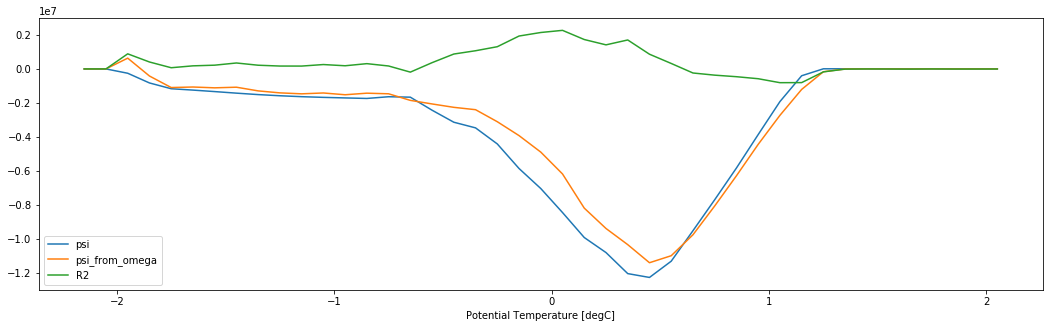

In [51]:
plt.figure(figsize=(18,5))
psi.mean(dim='time').plot(label='psi')
psi_from_omega.mean(dim='time').plot(label='psi_from_omega')
R2.mean(dim='time').plot(label='R2')
plt.legend();

# dV/dt = $\Psi$ + $\Omega$ + R1 + R2

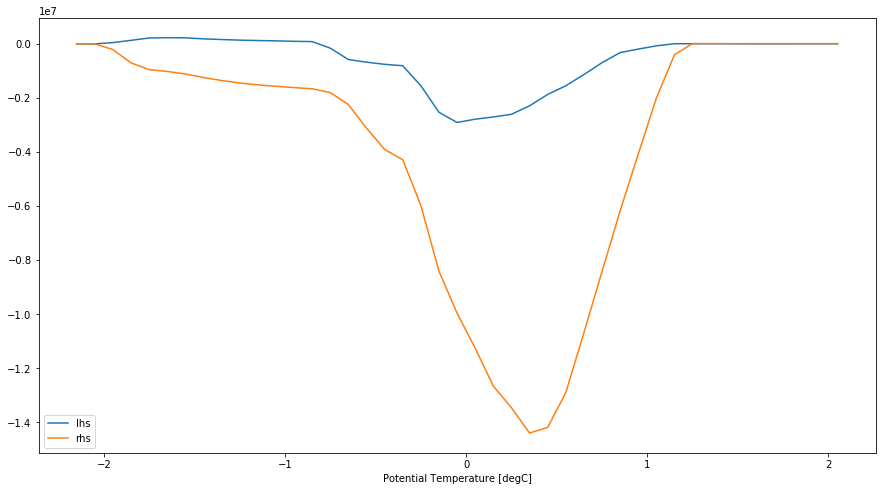

In [118]:
plt.figure(figsize=(15,8))
dVdt.mean(dim='time').plot(label='lhs') 
(omega_total + R1 + psi_from_omega - R2).mean(dim='time').plot(label='rhs')
plt.legend();

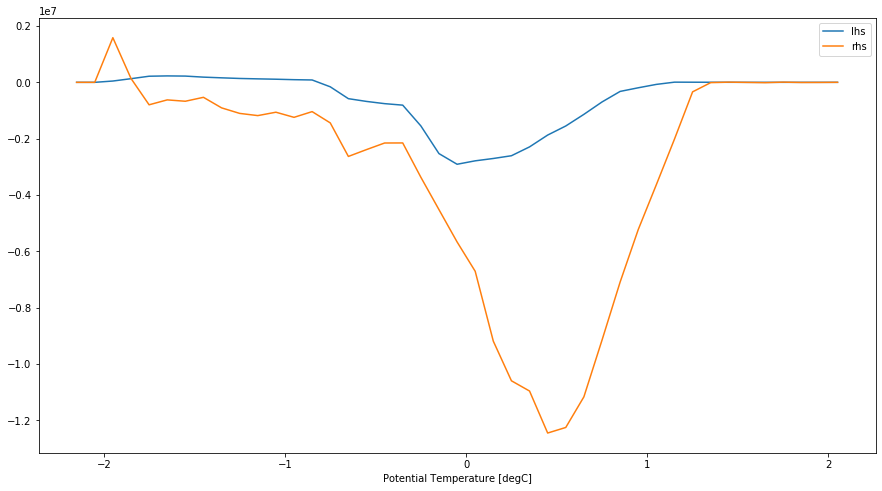

In [120]:
plt.figure(figsize=(15,8))
dVdt.mean(dim='time').plot(label='lhs') 
(omega_total + R1 + psi_from_omega + R2).mean(dim='time').plot(label='rhs')
plt.legend();